In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
img = np.zeros((600,600,3))+0.8

In [3]:
y,x = np.indices(img.shape[:2])

In [4]:
# 顏色對照 https://www.the3rdsequence.com/colors/rgb/200,155,115/
skin = list(np.array([200,155,115])/255)
skin_darker = list(np.array([57,38,22])/255)

forehead_skin = list(np.array([94,92,88])/255)
black = [0,0,0]
white = [1,1,1]
eye_plural = list(np.array([60,30,10])/255)
forehead_protect_color = list(np.array([227,224,220])/255)
forehead_circle_color = [0,0,0]

forehead = (x>140) & (x<460) & (y>120) &(y<=220)
forehead_protect = (x>200) & (x<400) & (y>130) &(y<=210)
head  = (x>150) & (x<450) & (y>220) &(y<400)


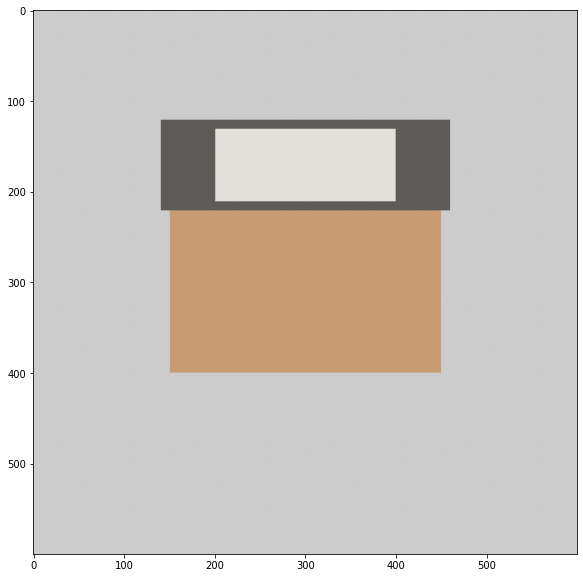

In [5]:
img[head] = skin
img[forehead] = forehead_skin
img[forehead_protect] = forehead_protect_color
plt.figure(figsize=(20,10))
plt.imshow(img, interpolation='bilinear');

In [6]:
def genForeheadCircle(_x,_y,r):
    return (x - _x)**2 + (y - _y)**2 < r**2 

In [7]:
forehead_circle_1 = genForeheadCircle(210,140,5) > genForeheadCircle(210,140,3)
forehead_circle_2 = genForeheadCircle(210,170,5) > genForeheadCircle(210,170,3)
forehead_circle_3 = genForeheadCircle(210,200,5) > genForeheadCircle(210,200,3)
forehead_circle_4 = genForeheadCircle(390,140,5) > genForeheadCircle(390,140,3)
forehead_circle_5 = genForeheadCircle(390,170,5) > genForeheadCircle(390,170,3)
forehead_circle_6 = genForeheadCircle(390,200,5) > genForeheadCircle(390,200,3)

In [8]:
img[forehead_circle_1] = forehead_circle_color
img[forehead_circle_2] = forehead_circle_color
img[forehead_circle_3] = forehead_circle_color
img[forehead_circle_4] = forehead_circle_color
img[forehead_circle_5] = forehead_circle_color
img[forehead_circle_6] = forehead_circle_color

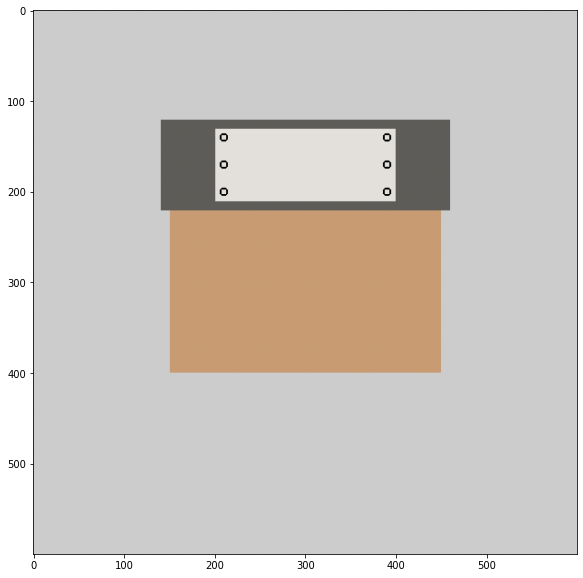

In [9]:
plt.figure(figsize=(20,10))

plt.imshow(img, interpolation='bilinear');

In [10]:
# 兩個同心圓
Konoha_1 = genForeheadCircle(300,170,20) > genForeheadCircle(300,170,17)
Konoha_2 = genForeheadCircle(300,177,13) > genForeheadCircle(300,177,9) 

# 圓的遮罩
Konoha_3 = genForeheadCircle(295,177,9) 
Konoha_4 = genForeheadCircle(323,160,10) 
Konoha_5 = genForeheadCircle(323,170,10)
Konoha_6 = genForeheadCircle(323,180,10) 


# 右上那一小搓
Konoha_7_1 = (x+300) + (y-480) - 290 > 0 
Konoha_7_2 = (x+300) + (y-480) - 295 > 0
Konoha_7_3 = (-x+300) + (y-480) + 347 > 0 
Konoha_7_4 = (-x+300) + (y-480) + 335 > 0
Konoha_7_5 = Konoha_7_3 > Konoha_7_4 
Konoha_7 = (Konoha_7_1 > Konoha_7_2) & Konoha_7_5

# 左下的小三角形
Konoha_8_1 = 1.2*(-x+280) + (y-167) > 0 
Konoha_8_2 = 1.5*(-x+285) - (y-170)  < 0 
Konoha_8_3 = y < 190
Konoha_8 = (Konoha_8_1 & Konoha_8_2) & Konoha_8_3

# 小三角形的遮罩
Konoha_9_1 = 1.2*(-x+280) + (y-170) - 4 > 0 
Konoha_9_2 = 1.2*(-x+285) - (y-172) + 4 < 0 
Konoha_9_3 = y < 185
Konoha_9 = (Konoha_9_1 & Konoha_9_2) & Konoha_9_3

img[Konoha_1] = forehead_circle_color
img[Konoha_2] = forehead_circle_color 
img[Konoha_3] = forehead_protect_color
img[Konoha_4] = forehead_protect_color
img[Konoha_5] = forehead_protect_color
img[Konoha_6] = forehead_protect_color

img[Konoha_7] = forehead_circle_color
img[Konoha_8] = forehead_circle_color
img[Konoha_9] =  forehead_protect_color

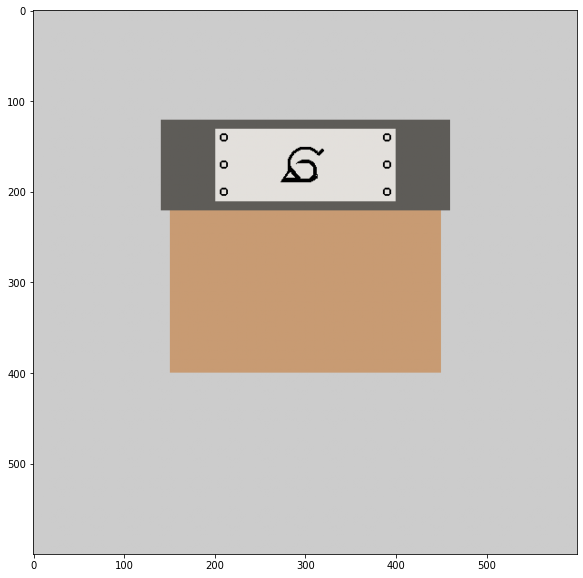

In [11]:
plt.figure(figsize=(20,10))
plt.imshow(img, interpolation='bilinear');

In [12]:
# 平滑的 jaw 參考 https://www.youtube.com/watch?v=mD0N7k6pYw8
jaw_1 =  abs(x-300) + 0.3*(y-300)-190
jaw_2 =  (x-200) - 1.7*(y-500) 
jaw_3 = jaw_2[:,::-1] 
jaw_line = jaw_1*jaw_2*jaw_3 < -160000
jaw =   jaw_line & (x >= 150) & (x <= 450) & (y >= 400) & (jaw_2>0) & (jaw_3>0)
img[jaw] = skin

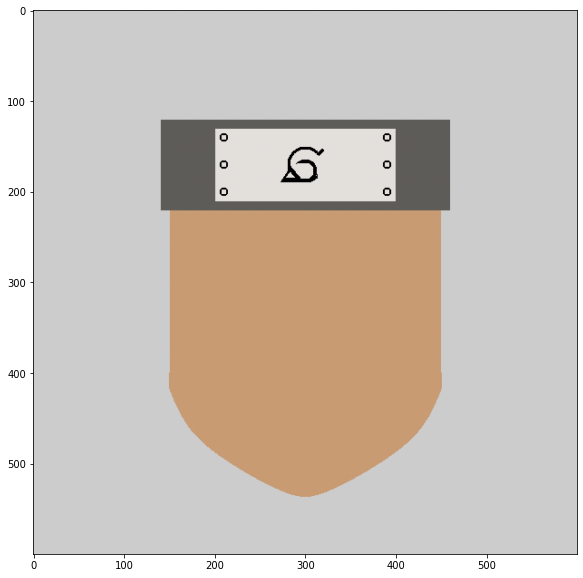

In [13]:
plt.figure(figsize=(20,10))
plt.imshow(img, interpolation='bilinear');

In [14]:
# 戶額裡面的圖樣

In [15]:
# 加上鬍子
bear_left = (-x+300) + (y-480)
bear_right =  (-x+300) - (y-480)
bear = (bear_right < 0) & (bear_left > 0)  & jaw
bear_line_left = (x <= 160) & (x >= 150) & (y >= 220) & (y <= 420) & (y >= 220)
bear_line_right = (x <= 450) & (x >= 440) & (y >= 220) & (y <= 420) & (y >= 220)


bear_left_line =  ((-x+140) + (y-400) > 0 ) & jaw
bear_right_line = ((-x+460) - (y-400) < 0) & jaw
 

img[bear_left_line] = black
img[bear_right_line] = black
img[bear_line_left] = black
img[bear_line_right] = black
img[bear] = black

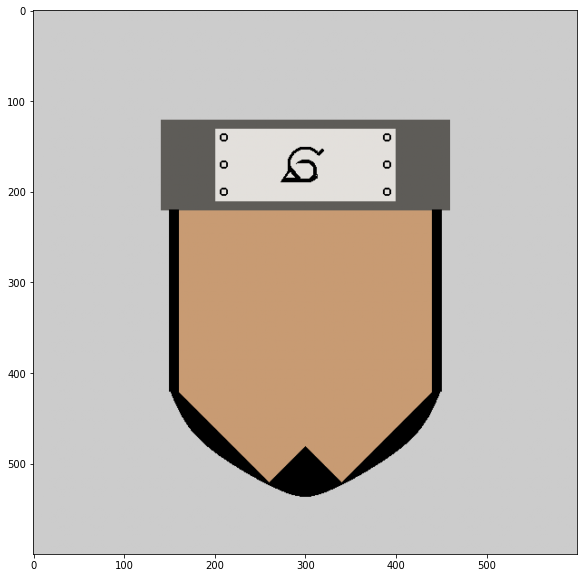

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(img, interpolation='bilinear');

In [17]:
# 眉毛
eye_brown_1 = 0.3*(-x+200) + (y-220) > 0 
eye_brown_2 = 0.3*(-x+200) - (y-220)  < 0 
eye_brown_3 = 0.2*(-x+160) + (y-220) > 0 
eye_brown_4 = 0.2*(-x+160) - (y-220)  < 0 


eye_brown_5 = 0.3*(-x+400) + (y-220) > 0 
eye_brown_6 = 0.3*(-x+400) - (y-220)  < 0 
eye_brown_7 = 0.2*(-x+440) + (y-220) > 0 
eye_brown_8 = 0.2*(-x+440) - (y-220)  < 0 

eye_brown_left = (eye_brown_1 & eye_brown_2) > (eye_brown_3 & eye_brown_4)
eye_brown_right = (eye_brown_5 & eye_brown_6) > (eye_brown_7 & eye_brown_8)

In [18]:
img[eye_brown_left] = black
img[eye_brown_right] = black

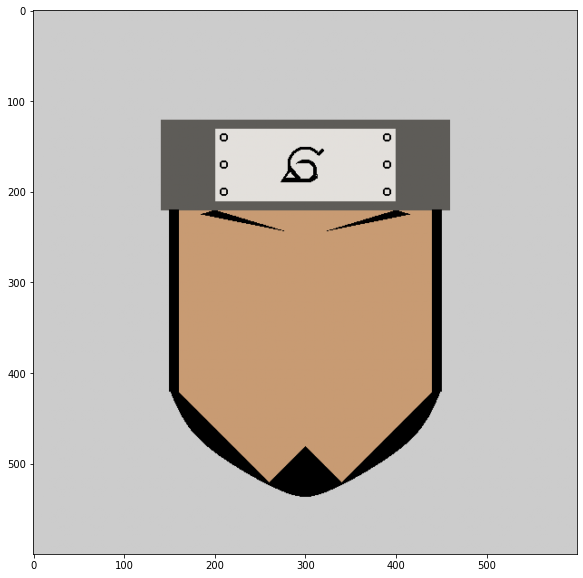

In [19]:
plt.figure(figsize=(20,10))
plt.imshow(img, interpolation='bilinear');

In [20]:
# 眼睛
left_eye = 0.7*(x - 230)**2 + 5*(y - 275)**2 < 35**2 
right_eye = 0.7*(x - 370)**2 + 5*(y - 275)**2 < 35**2 
# 眼白
left_white = 0.7*(x - 230)**2 + 8*(y - 277)**2 < 33**2 
right_white = 0.7*(x - 370)**2 + 8*(y - 277)**2 < 33**2
# 眼球
left_eye_plural = ((x - 230)**2 + (y - 277)**2 < 15**2) & left_white
right_eye_plural = ((x - 370)**2 + (y - 277)**2 < 15**2) & right_white
#瞳孔
left_pupil = ((x - 230)**2 + (y - 277)**2 < 5**2)
right_pupil = ((x - 370)**2 + (y - 277)**2 < 5**2)
#反光
left_pupil_ = ((x - 234)**2 + (y - 280)**2 < 2**2)
right_pupil_ = ((x - 374)**2 + (y - 280)**2 < 2**2)

In [21]:
img[left_eye] = black
img[right_eye] = black
img[left_white] = white
img[right_white] = white
img[left_eye_plural] = eye_plural
img[right_eye_plural] = eye_plural
img[left_pupil] = black
img[right_pupil] = black
img[left_pupil_] = white
img[right_pupil_] = white

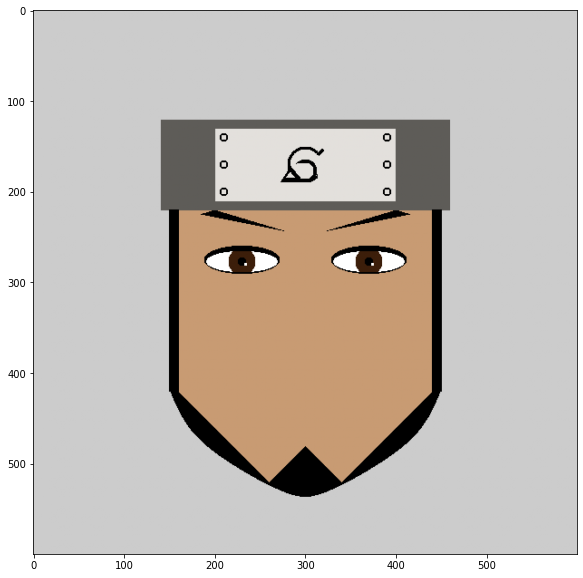

In [22]:
plt.figure(figsize=(20,10))
plt.imshow(img, interpolation='bilinear');

In [23]:
def mirror(image):
    return image | image[:,::-1]

In [24]:
def mirror_down(image):
    return image | image[::-1,:]

In [25]:
# 輪廓線 - 眉毛
left_bind = 4*25*(y-240)  - (x-230)**2 > 0
left_bind_ = 4*25*(y-242)  - (x-230)**2 > 0
bond_left = (x > 180) & (x < 270)
bind_left = (left_bind > left_bind_) & bond_left

bind_right = mirror(bind_left)

# 輪廓線 - 鼻子 
right_bind_1 = (y-240)**2  - 300*(x-320) > 0
right_bind_2 = (y-245)**2  - 300*(x-320) > 0
bond_right = (y < 300) 
nose_right = (right_bind_1 > right_bind_2) & bond_right
nose_left = mirror(nose_right)


right_bind_3 =(y-530)**2  + 600*(x-380) > 0
right_bind_4 = (y-560)**2  + 600*(x-400) > 0
bond_right = (y < 380) 
nose_right_down = (right_bind_3 > right_bind_4) & bond_right
nose_left_down = mirror(nose_right_down)


left_bind_3 =(y-500)**2  + 300*(x-300) > 0
left_bind_4 = (y-500)**2  + 300*(x-305) > 0
bond_left = (y < 390) & (y > 380)
nose_left_down_2 = (left_bind_3 > left_bind_4) & bond_left
nose_right_down_2 = mirror(nose_left_down_2)

left_bind_5 =(y-500)**2  + 200*(x-335) > 0
left_bind_6 = (y-500)**2  + 200*(x-340) > 0
bond_left = (y < 395) & (y > 380)
nose_left_down_3 = (left_bind_5 > left_bind_6) & bond_left
nose_right_down_3 = mirror(nose_left_down_3)

# 輪廓線 - 嘴

month = (x > 240) & (x < 355) & (y > 440) & (y < 442)
smile_1 =(y-500)**2  + 200*(x-370) > 0
smile_2 = (y-500)**2  + 200*(x-373) > 0
bond_smile_1 = (y < 442) & (y > 436)
smile = (smile_1 > smile_2) & bond_smile_1
smile_bind =  4*40*(y-436)  - (x-300)**2 > 0
smile_bind_ = 4*40*(y-438)  - (x-300)**2 > 0
bind_smile = (smile_bind > smile_bind_) & (y < 442)

# 輪廓線 - 下巴
chin_bind =  4*300*(y-464)  + (x-300)**2 > 0
chin_bind_ = 4*300*(y-466)  + (x-300)**2 > 0
bind_chin = (chin_bind > chin_bind_) & (x > 260) &  (x < 350)


In [26]:
img[bind_left] = black
img[bind_right] = black
img[nose_right] = black
img[nose_left] = black
img[nose_right_down] = black
img[nose_left_down] = black
img[nose_left_down_2] = black
img[nose_right_down_2] = black
img[nose_left_down_3] = black
img[nose_right_down_3] = black
img[month] = black
img[smile] = black
img[bind_smile] = black
img[bind_chin] = black

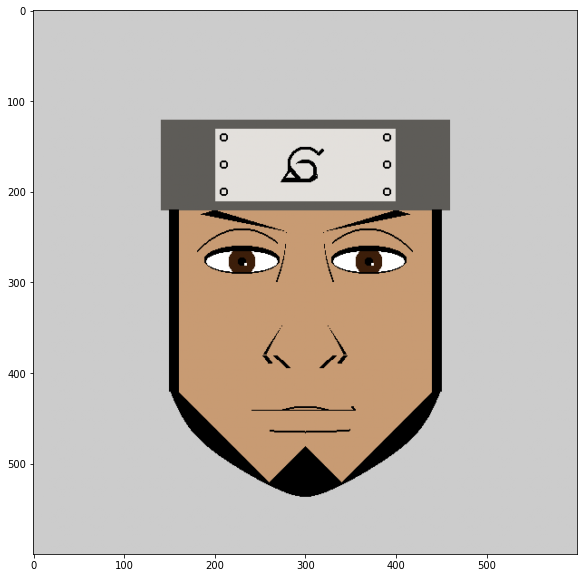

In [27]:
plt.figure(figsize=(20,10))
plt.imshow(img, interpolation='bilinear');

In [28]:
# 耳朵
ear_left_1 = 1.8*(-x+146) + (y-220) > 0 
ear_left_2 = 1.8*(-x+146) - (y-220)  < 0 
ear_left_3 = (y < 300) & (x < 150)
ear_left = (ear_left_1 & ear_left_2) & ear_left_3 
_ear_left = (x - 146)**2 + 0.3*(y - 300)**2 < 36**2

ear_left = ear_left + mirror_down(ear_left) & _ear_left
ear_right = mirror(ear_left )

# 耳朵 - 輪廓線

ear_left_1 = 1.8*(-x+142) + (y-220) > 0 
ear_left_2 = 1.8*(-x+142) - (y-220)  < 0 
ear_left_3 = (y < 300) & (x < 150)
ear_left_ = (ear_left_1 & ear_left_2) & ear_left_3 
_ear_left = (x - 142)**2 + 0.3*(y - 300)**2 < 36**2

ear_left_ = ear_left_ + mirror_down(ear_left_) & _ear_left
ear_right_ = mirror(ear_left_)

# 耳內 - 輪廓線
ear_bind = 7*(y-250)  - (x-140)**2 > 0
ear_bind_ =7*(y-255)  - (x-140)**2 > 0
bind_ear_left = (ear_bind > ear_bind_) & (y < 300)
bind_ear_right = mirror(bind_ear_left)

ear_bind = (y-303)**2  - 70*(x-138) > 0
ear_bind_ =(y-303)**2  - 70*(x-135) > 0
bind_ear_left_ = (ear_bind > ear_bind_ ) & (x < 160)
bind_ear_right_ = mirror(bind_ear_left_)

In [29]:
img[ear_left_] = black
img[ear_right_] = black
img[ear_left] = skin
img[ear_right] = skin

img[bind_ear_left] = black
img[bind_ear_right] = black
img[bind_ear_left_] = black
img[bind_ear_right_] = black

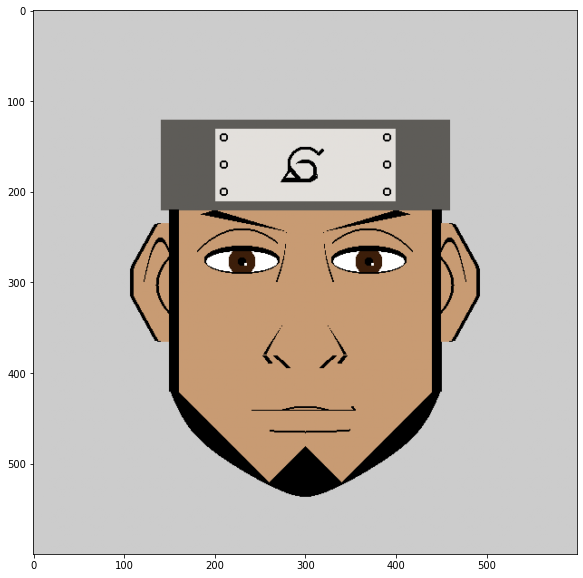

In [30]:
plt.figure(figsize=(20,10))
plt.imshow(img, interpolation='bilinear');

In [31]:
# 補陰影
#  下巴
chin_bind =  4*300*(y-466)  + (x-300)**2 > 0
chin_bind_ = 4*300*(y-472)  + (x-300)**2 > 0
bind_chin = (chin_bind > chin_bind_) & (x > 275) &  (x < 330)
#  耳
bind_ear_left =  ((y-303)**2  - 70*(x-138) < 0) & (x < 150) 
bind_ear_right = mirror(bind_ear_left)

# 眉間
eye_brown_1 = 0.32*(-x+240) + (y-235) > 0 
eye_brown_2 = 0.32*(-x+240) - (y-235)  < 0 
eye_brown_3 = 0.3*(-x+200) + (y-235) > 0 
eye_brown_4 = 0.3*(-x+200) - (y-235)  < 0 

eye_brown_left_up = ((eye_brown_1 & eye_brown_2) > (eye_brown_3 & eye_brown_4)) & (x < 280)
eye_brown_right_up = mirror(eye_brown_left_up)

right_bind_1 = (y-230)**2  - 300*(x-322) > 0
right_bind_2 = (y-245)**2  - 300*(x-322) > 0
bond_right = (y < 300) 
eye_brown_right_ = (right_bind_1 > right_bind_2) & bond_right
eye_brown_left_ = mirror(eye_brown_right_)


In [32]:
img[bind_chin] = skin_darker
img[bind_ear_left] = skin_darker
img[bind_ear_right] = skin_darker

img[eye_brown_left_up] = skin_darker
img[eye_brown_right_up] = skin_darker
img[eye_brown_right_] = skin_darker
img[eye_brown_left_] = skin_darker

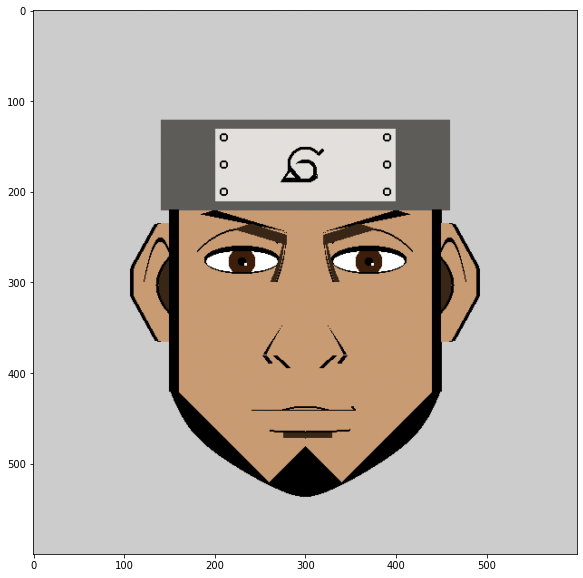

In [33]:
plt.figure(figsize=(20,10))
plt.imshow(img, interpolation='bilinear');

In [38]:
def genhair(x_1,x_2):
    hair_1 =  ((y-120)**2  - 150*(x-x_1) < 0) 
    hair_2 = (-x+x_2) + 0.25*(-y+120) > 0 
    return hair_1 & hair_2 & (y <= 120)

In [42]:
# 頭髮
hair = genhair(138,200)
hair_2 = genhair(190,252)
hair_3 = genhair(242,304)
hair_4 = genhair(294,356)
hair_5 = genhair(346,408)
hair_6 = genhair(398,460)

In [43]:
img[hair] = black
img[hair_2] = black
img[hair_3] = black
img[hair_4] = black
img[hair_5] = black
img[hair_6] = black

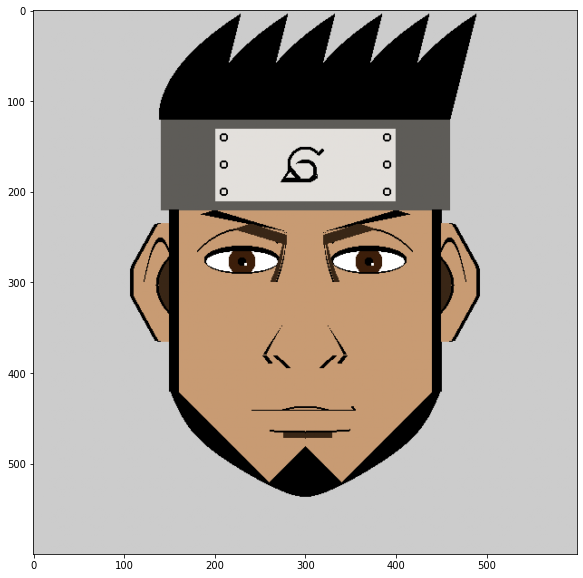

In [44]:
plt.figure(figsize=(20,10))
plt.imshow(img, interpolation='bilinear');